# Scanpy workflow 

## Aim:
Run scanpy work flow.

This is the on scanpy official website.

## Ref:

## Note for figshare search

We can search the dataset at the website search box with something like:
"10.6084/m9.figshare.22716739"

In [2]:
# Core scverse libraries
from __future__ import annotations

import anndata as ad

# Data retrieval
import pooch
import scanpy as sc
sc.settings.set_figure_params(dpi=50, facecolor="white")

/config/workspace/.venv/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


The data used in this basic preprocessing and clustering tutorial was collected from bone marrow mononuclear cells of healthy human donors and was part of openproblem’s NeurIPS 2021 benchmarking dataset [Luecken et al., 2021]. The samples used in this tutorial were measured using the 10X Multiome Gene Expression and Chromatin Accessability kit.

We are reading in the count matrix into an AnnData object, which holds many slots for annotations and different representations of the data. See Getting started with anndata for a tutorial.

In [3]:
# The code in this section will generate error, which indicating "wrong URL???".
# This could be a result of changing API of figshare???

# --- NOT WORKING ======
# see the below section for working code to download.

EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)

EXAMPLE_DATA.load_registry_from_doi()

#below is a dictionary!!
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {} #dictionary. 

for sample_id, filename in samples.items():
    print(filename)
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

s1d1_filtered_feature_bc_matrix.h5


HTTPError: 403 Client Error: Forbidden for url: https://ndownloader.figshare.com/files/40347877

In [4]:
#this section of code was generated by google and used to test that older (?) API.
#it seems that the old api doesn't work now. We will get error.
# see the next section for correct code for downloading

#-------NOT WORKING=============

import pooch
import os

# Create a Pooch instance for your project's data
# Pooch will store files in a specific cache folder (e.g., ~/.cache/mypackage)
POOCH = pooch.create(
    path=pooch.os_cache("my_figshare_project"),
    base_url="doi:10.6084/m9.figshare.14763051.v1/", # Base URL is the dataset DOI
    registry={
        "tiny-data.txt": "md5:70e2afd3fd7e336ae478b1e740a5f08e",
        "store.zip": "md5:7008231125631739b64720d1526619ae",
    },
)

def fetch_tiny_data():
    """Fetch the tiny data file and return its local path."""
    # Pooch.fetch looks up the file name in the registry and handles download/caching
    fname = POOCH.fetch("tiny-data.txt")
    return fname

# Example usage:
data_file_path = fetch_tiny_data()
print(f"Path to tiny-data.txt: {data_file_path}")

HTTPError: 403 Client Error: Forbidden for url: https://ndownloader.figshare.com/files/28369770

In [5]:
import pooch
import requests
from pathlib import Path

# Figshare article ID (from the DOI)
ARTICLE_ID = 22716739

# Where to store the data
DATA_DIR = Path("figshare_data")
DATA_DIR.mkdir(exist_ok=True)

# Figshare API endpoint to list files
api_url = f"https://api.figshare.com/v2/articles/{ARTICLE_ID}/files"

# Get metadata for all files in the article
response = requests.get(api_url)
response.raise_for_status()
files = response.json()

print(f"files from response.json : {files}")
print(f"Found {len(files)} files. Downloading...")

for f in files:
    file_id = f["id"]
    filename = f["name"]
    hash_md5=f["supplied_md5"]

    # Direct download URL for Figshare files
    download_url = f"https://figshare.com/ndownloader/files/{file_id}"

    local_path = pooch.retrieve(
        url=download_url,
        fname=filename,
        path=DATA_DIR,
        known_hash="md5:"+hash_md5,  # set to a hash string for full reproducibility if available
        progressbar=True
    )

    print(f"Downloaded: {local_path}")
    
    sample_adata = sc.read_10x_h5(local_path)
    sample_adata.var_names_make_unique()
    adatas[filename] = sample_adata

files from response.json : [{'id': 40347877, 'name': 's1d1_filtered_feature_bc_matrix.h5', 'size': 22848647, 'is_link_only': False, 'download_url': 'https://ndownloader.figshare.com/files/40347877', 'supplied_md5': 'a99285913ea3f3d22600d3d2f8a88e34', 'computed_md5': 'a99285913ea3f3d22600d3d2f8a88e34', 'mimetype': 'application/x-hdf'}, {'id': 40347880, 'name': 's1d3_filtered_feature_bc_matrix.h5', 'size': 20432298, 'is_link_only': False, 'download_url': 'https://ndownloader.figshare.com/files/40347880', 'supplied_md5': '825f7f7578e3dc0b8955f5a97a402338', 'computed_md5': '825f7f7578e3dc0b8955f5a97a402338', 'mimetype': 'application/x-hdf'}]
Found 2 files. Downloading...
Downloaded: /config/workspace/figshare_data/s1d1_filtered_feature_bc_matrix.h5


/config/workspace/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/config/workspace/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Downloaded: /config/workspace/figshare_data/s1d3_filtered_feature_bc_matrix.h5


/config/workspace/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/config/workspace/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
#check the adatas

adatas

{'s1d1_filtered_feature_bc_matrix.h5': AnnData object with n_obs × n_vars = 8785 × 36601
     var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence',
 's1d3_filtered_feature_bc_matrix.h5': AnnData object with n_obs × n_vars = 8340 × 36601
     var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'}

In [8]:
# replace the name to get short

import re

for name, adt in adatas.items():
    tname=re.sub("_.*","", name)
    print(tname)

#change in the key names in data
adatas2={re.sub("_.*","",k):v for k, v in adatas.items()}

print(f"adatas2:{adatas2}")

print(adatas2['s1d1'])

s1d1
s1d3
adatas2:{'s1d1': AnnData object with n_obs × n_vars = 8785 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 's1d3': AnnData object with n_obs × n_vars = 8340 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'}
AnnData object with n_obs × n_vars = 8785 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'


In [9]:
#check whether the two dictionary pointing to the same data
print(adatas['s1d1_filtered_feature_bc_matrix.h5'] is adatas2['s1d1'])

print("They are pointing to the same object, but in this case, it is ok.")

True
They are pointing to the same object, but in this case, it is ok.


In [10]:
#Now concate the two samples into one data

adata = ad.concat(adatas2, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


/config/workspace/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

In [11]:
adata.write("open_problem_example.h5ad")

# Read from .h5ad format
adata = ad.read_h5ad("open_problem_example.h5ad")


## Quality Control

The scanpy function calculate_qc_metrics() calculates common quality control (QC) metrics, which are largely based on calculateQCMetrics from scater [McCarthy et al., 2017]. One can pass specific gene population to calculate_qc_metrics() in order to calculate proportions of counts for these populations. Mitochondrial, ribosomal and hemoglobin genes are defined by distinct prefixes as listed below.

In [13]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

In [14]:
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

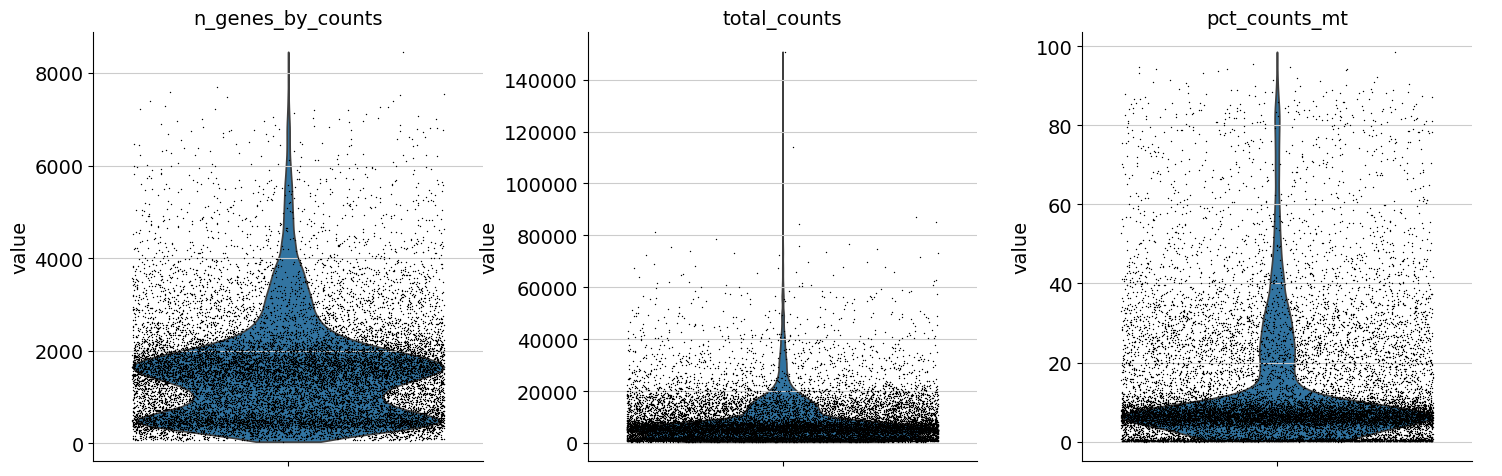

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "pct_counts_hb", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

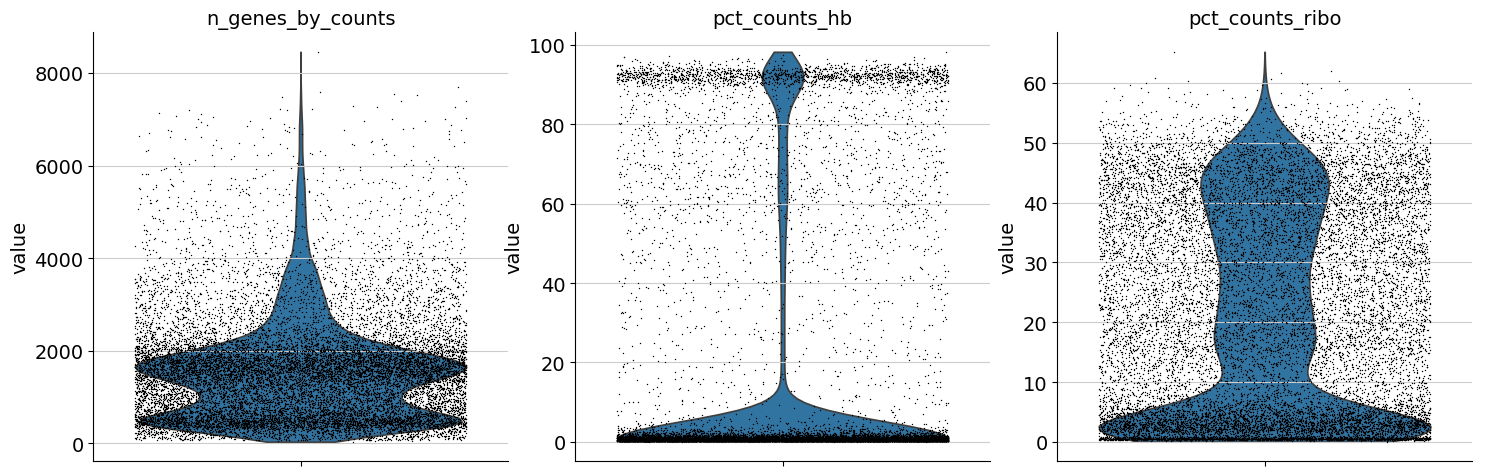

In [17]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "pct_counts_hb", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)

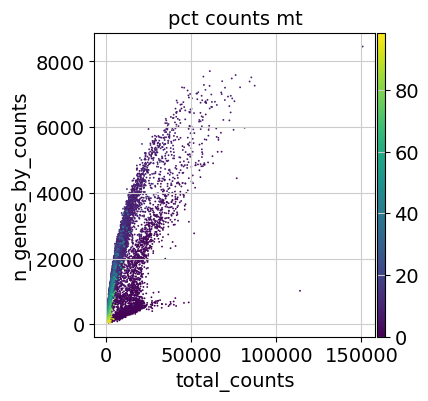

In [18]:
#Additionally, it is useful to consider QC metrics jointly by inspecting a scatter plot colored by pct_counts_mt.

sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Based on the QC metric plots, one could now remove cells that have too many mitochondrial genes expressed or too many total counts by setting manual or automatic thresholds. However, sometimes what appears to be poor QC metrics can be driven by real biology so we suggest starting with a very permissive filtering strategy and revisiting it at a later point. We therefore now only filter cells with less than 100 genes expressed and genes that are detected in less than 3 cells.

Additionally, it is important to note that for datasets with multiple batches, quality control should be performed for each sample individually as quality control thresholds can vary substantially between batches.


In [19]:

sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

Doublet detection
As a next step, we run a doublet detection algorithm. Identifying doublets is crucial as they can lead to misclassifications or distortions in downstream analysis steps. Scanpy contains the doublet detection method Scrublet [Wolock et al., 2019]. Scrublet predicts cell doublets using a nearest-neighbor classifier of observed transcriptomes and simulated doublets. scanpy.pp.scrublet() adds doublet_score and predicted_doublet to .obs. One can now either filter directly on predicted_doublet or use the doublet_score later during clustering to filter clusters with high doublet scores.

In [21]:
sc.pp.scrublet(adata, batch_key="sample")

We can remove doublets by either filtering out the cells called as doublets, or waiting until we’ve done a clustering pass and filtering out any clusters with high doublet scores.

### next we want to do filter based on the doublet score .

In [23]:
print(adata)

print(adata.uns["scrublet"])

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'
{'batches': {'s1d1': {'doublet_scores_sim': array([0.18338109, 0.02898551, 0.09018356, ..., 0.30751708, 0.09018356,
       0.12643678], shape=(17426,)), 'doublet_parents': array([[8657, 6227],
       [ 254, 2002],
       [4443,  272],
       ...,
       [3940, 8212],
       [7000, 2547],
       [4894,  7

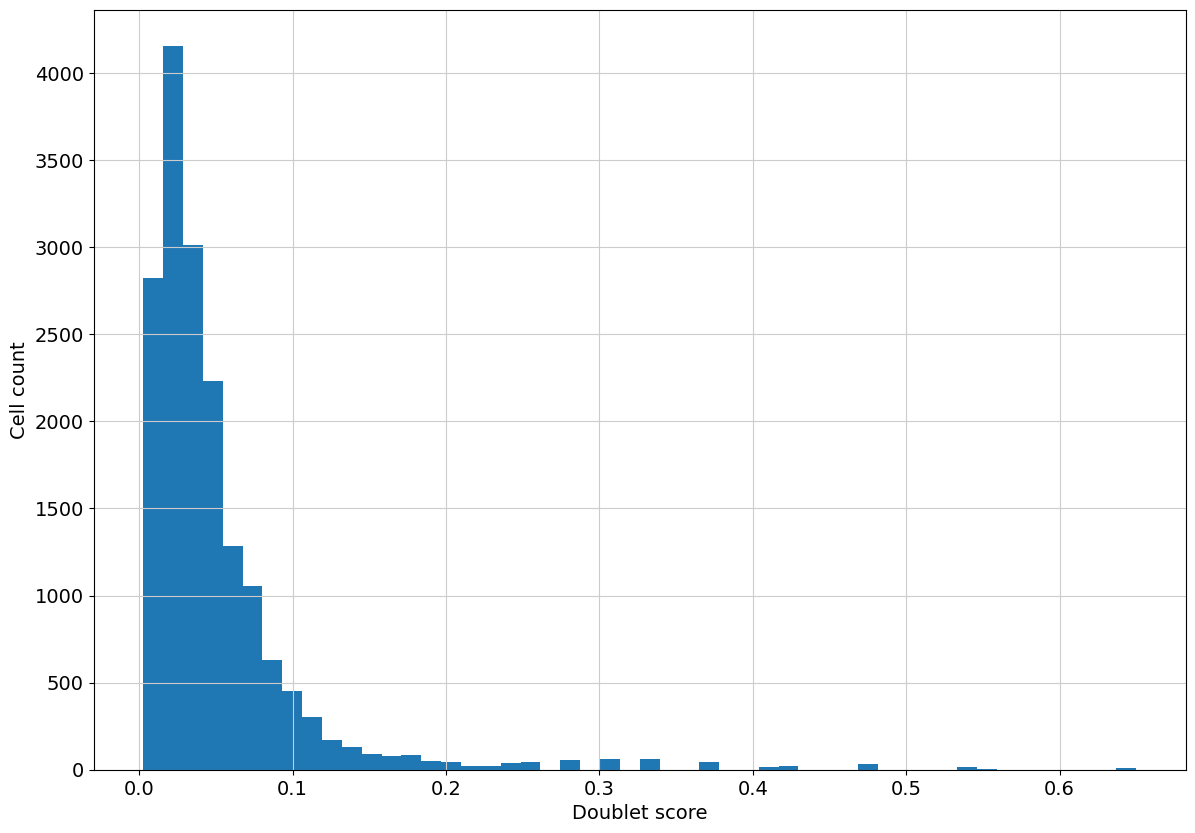

In [30]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(14,10))
plt.hist(adata.obs['doublet_score'], bins=50)
plt.xlabel("Doublet score")
plt.ylabel("Cell count")
plt.show()

In [32]:
threshold=0.25
adata_filtered=adata[adata.obs['doublet_score'] < threshold].copy()

print(adata_filtered)
print(adata)

AnnData object with n_obs × n_vars = 16669 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'
AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_

Alternative methods for doublet detection within the scverse ecosystem are DoubletDetection and SOLO. You can read more about these in the Doublet Detection chapter of Single Cell Best Practices.

https://github.com/JonathanShor/DoubletDetection

https://docs.scvi-tools.org/en/stable/user_guide/models/solo.html

https://www.sc-best-practices.org/preprocessing_visualization/quality_control.html#doublet-detection


Normalization
The next preprocessing step is normalization. A common approach is count depth scaling with subsequent log plus one (log1p) transformation. Count depth scaling normalizes the data to a “size factor” such as the median count depth in the dataset, ten thousand (CP10k) or one million (CPM, counts per million). The size factor for count depth scaling can be controlled via target_sum in pp.normalize_total. We are applying median count depth normalization with log1p transformation (AKA log1PF).


In [33]:

# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [34]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet', 'log1p'
    layers: 'counts'

In [ ]:
Feature selection
As a next step, we want to reduce the dimensionality of the dataset and only include the most informative genes. This step is commonly known as feature selection. The scanpy function pp.highly_variable_genes annotates highly variable genes by reproducing the implementations of Seurat [Satija et al., 2015], Cell Ranger [Zheng et al., 2017], and Seurat v3 [Stuart et al., 2019] depending on the chosen flavor.


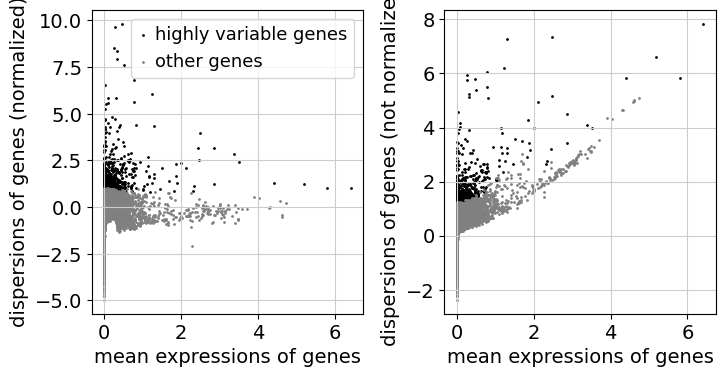

In [35]:

sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")
sc.pl.highly_variable_genes(adata)

Dimensionality Reduction
Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.


In [36]:

sc.tl.pca(adata)


Let us inspect the contribution of single PCs to the total variance in the data. This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function leiden() or tsne(). In our experience, there does not seem to be signifigant downside to overestimating the numer of principal components.


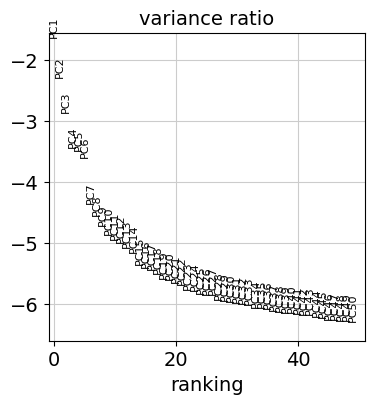

In [37]:

sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

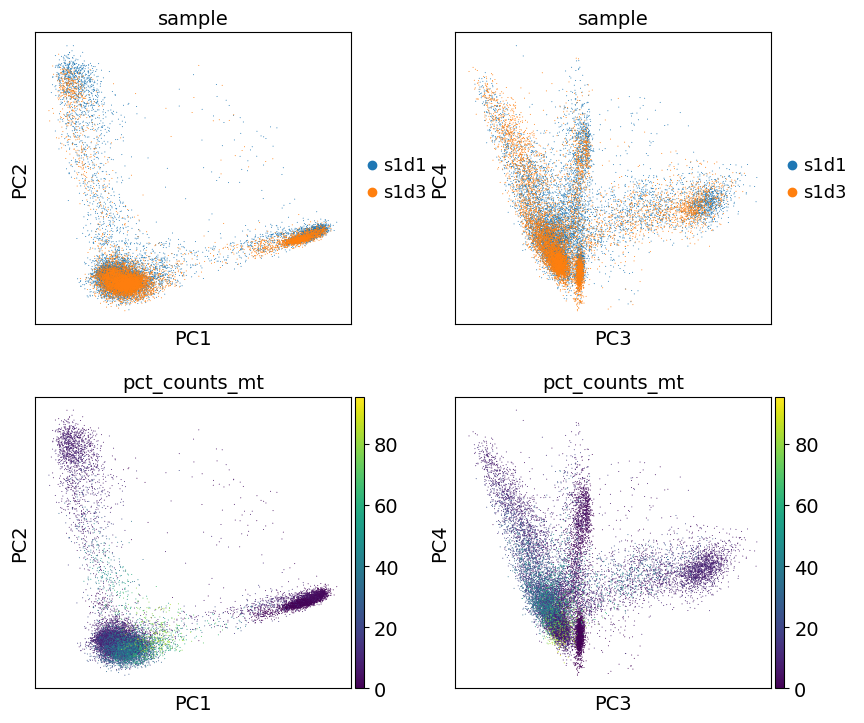

In [38]:
#You can also plot the principal components to see if there are any potentially undesired features (e.g. batch, QC metrics) driving signifigant variation in this dataset. In this case, there isn’t anything too alarming, but it’s a good idea to explore this.

sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

Nearest neighbor graph construction and visualization
Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.


In [39]:

sc.pp.neighbors(adata)

/config/workspace/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



This graph can then be embedded in two dimensions for visualiztion with UMAP [McInnes et al., 2018]:



In [40]:
sc.tl.umap(adata)


We can now visualize the UMAP according to the sample.


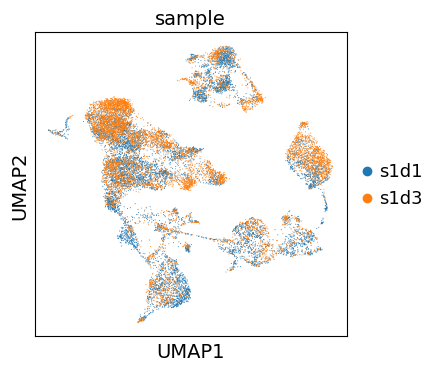

In [41]:

sc.pl.umap(
    adata,
    color="sample",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

Even though the data considered in this tutorial includes two different samples, we only observe a minor batch effect and we can continue with clustering and annotation of our data.

If you inspect batch effects in your UMAP it can be beneficial to integrate across samples and perform batch correction/integration. We recommend checking out scanorama and scvi-tools for batch integration.

Clustering
As with Seurat and many other frameworks, we recommend the Leiden graph-clustering method (community detection based on optimizing modularity) [Traag et al., 2019]. Note that Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.



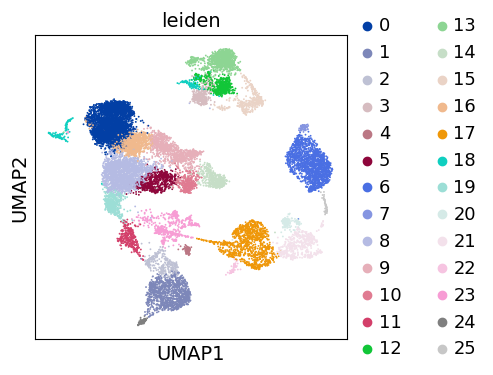

In [42]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster,
# especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
sc.pl.umap(adata, color=["leiden"])

## Re-assess quality control and cell filtering

As indicated before, we will now re-assess our filtering strategy by visualizing different QC metrics using UMAP.

**Feng's notes: it seems to me we also should check the pct_mt, pct_ribo, pct_hb, for qc/filtering purpose. but I guess, we could also leave them in the data and then use clustering to check out the specific cell populations (say, mt rich cell cluster/populated and then remove them from data when doing downstream analysis.)**

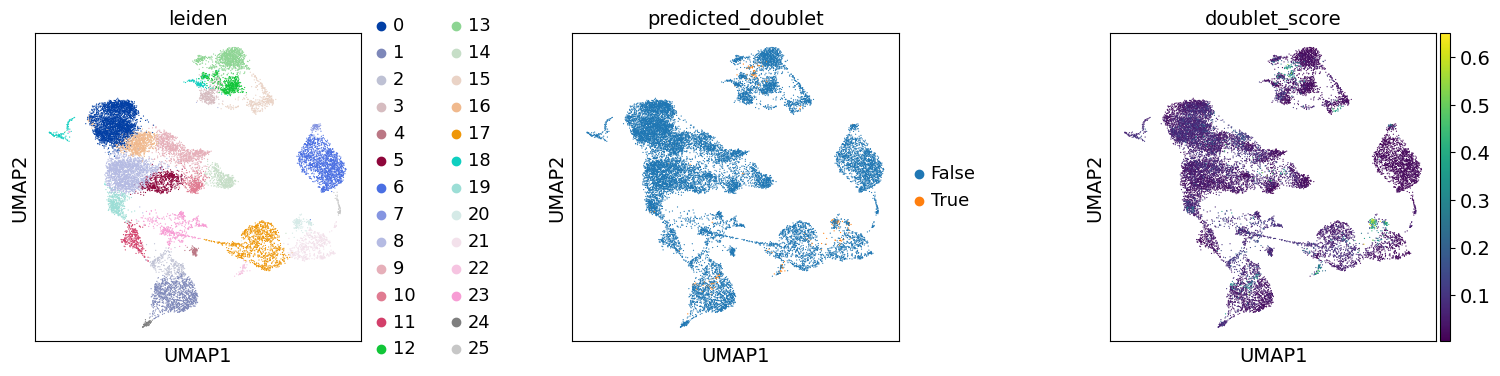

In [43]:

sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)
